# FIFA World Cup 2022 Group Stage Prediction

One of the biggest event in soccer - FIFA World Cup 2022 begun. 

Few weeks ago, I used a simple machine learning models to predict the result in FIFA World Cup Group Stage just for fun. 

At the time I created this notebook (11.22), the model successfully predicted all 6 matches including the result of USA vs Wales (Draw).

It looked like just a coincidence, but I decided to share this surprising result with the community.

Update 11.24: Saudi Arabia and Japan won on their match against Argentina and Germany! Now model's accuracy is far below 100%..

Here is the result you can get after executing this notebook.

```text
___Starting group H:___
Uruguay vs. South Korea: Draw
Uruguay vs. Portugal: Portugal wins with 0.58
Uruguay vs. Ghana: Uruguay wins with 0.69
South Korea vs. Portugal: Portugal wins with 0.65
South Korea vs. Ghana: South Korea wins with 0.62
Portugal vs. Ghana: Portugal wins with 0.71
___Starting group D:___
Denmark vs. Tunisia: Denmark wins with 0.55
Denmark vs. France: France wins with 0.59
Denmark vs. Australia: Denmark wins with 0.60
Tunisia vs. France: France wins with 0.68
Tunisia vs. Australia: Draw
France vs. Australia: France wins with 0.63
___Starting group E:___
Germany vs. Japan: Draw
Germany vs. Spain: Spain wins with 0.58
Germany vs. Costa Rica: Germany wins with 0.55
Japan vs. Spain: Spain wins with 0.64
Japan vs. Costa Rica: Draw
Spain vs. Costa Rica: Spain wins with 0.58
___Starting group B:___
Iran vs. England: England wins with 0.63
Iran vs. USA: USA wins with 0.57
Iran vs. Wales: Wales wins with 0.56
England vs. USA: Draw
England vs. Wales: Draw
USA vs. Wales: Draw
___Starting group C:___
Argentina vs. Saudi Arabia: Argentina wins with 0.69
Argentina vs. Mexico: Draw
Argentina vs. Poland: Argentina wins with 0.57
Saudi Arabia vs. Mexico: Mexico wins with 0.73
Saudi Arabia vs. Poland: Poland wins with 0.67
Mexico vs. Poland: Draw
___Starting group G:___
Switzerland vs. Cameroon: Switzerland wins with 0.60
Switzerland vs. Brazil: Brazil wins with 0.63
Switzerland vs. Serbia: Draw
Cameroon vs. Brazil: Brazil wins with 0.75
Cameroon vs. Serbia: Serbia wins with 0.65
Brazil vs. Serbia: Brazil wins with 0.56
___Starting group F:___
Morocco vs. Croatia: Croatia wins with 0.60
Morocco vs. Belgium: Belgium wins with 0.66
Morocco vs. Canada: Morocco wins with 0.55
Croatia vs. Belgium: Belgium wins with 0.61
Croatia vs. Canada: Croatia wins with 0.60
Belgium vs. Canada: Belgium wins with 0.65
___Starting group A:___
Senegal vs. Qatar: Senegal wins with 0.62
Senegal vs. Netherlands: Netherlands wins with 0.61
Senegal vs. Ecuador: Senegal wins with 0.59
Qatar vs. Netherlands: Netherlands wins with 0.74
Qatar vs. Ecuador: Ecuador wins with 0.57
Netherlands vs. Ecuador: Netherlands wins with 0.64

```


I referenced some awesome kaggle notebooks for creating this, here are the references.

https://www.kaggle.com/code/agostontorok/soccer-world-cup-2018-winner/notebook

https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

# Data Preprocessing

- `match_df`: International FIFA matches from 1993
- `rank_df`: FIFA Rankings Dataset
- `worldcup_match_df`: Qatar World Cup Match Schedule Dataset
- `teams_df`: Qatar World Cup Participants Dataset


In [1]:
import pandas as pd

match_df = pd.read_csv("international_matches.csv")
rank_df = pd.read_csv("fifa_ranking-2022-10-06.csv")
worldcup_match_df = pd.read_csv("matchs-schudule.csv", sep=";")
teams_df = pd.read_csv("Qatar2022-teams.csv", sep=";")

Let's take a loot at each dataframes by `.head()`.

In [2]:
match_df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
rank_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


In [4]:
worldcup_match_df.head()

,match,date,country1,coutry2,phase
0,1,21/11/2022,Qatar,Ecuador,group matches
1,2,21/11/2022,Senegal,Netherlands,group matches
2,3,21/11/2022,England,Iran,group matches
3,4,21/11/2022,USA,Wales,group matches
4,5,22/11/2022,France,Australia,group matches


In [5]:
teams_df.head()

,Team,Group
0,Senegal,A
1,Qatar,A
2,Netherlands,A
3,Ecuador,A
4,Iran,B


Some countries have different names. Let's standardize it.

In [6]:
match_df = match_df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})
rank_df = rank_df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})

# Feature Extraction

I extracted some features for predicting match result, similar to the approach [here](https://www.kaggle.com/code/agostontorok/soccer-world-cup-2018-winner/notebook). I haven't tried alot of experiments, so these might be not the best features. I recommend to try your own ideas here.

For your information, `is_stake` indicates whether the match is Friendly or not. Some teams tend to not do their best on friendly matches, so `is_stake` handles these cases.

Similarly, I added `is_worldcup` to specially handle world cup matches.

In [7]:
match_df['rank_difference'] = match_df['home_team_fifa_rank'] - match_df['away_team_fifa_rank']
match_df['average_rank'] = (match_df['home_team_fifa_rank'] + match_df['away_team_fifa_rank'])/2
match_df['point_difference'] = match_df['home_team_total_fifa_points'] - match_df['away_team_total_fifa_points']
match_df['is_stake'] = match_df['tournament'] != 'Friendly'
match_df['is_worldcup'] = 'FIFA World Cup' in match_df['tournament']

match_df['score_difference'] = match_df['home_team_score'] - match_df['away_team_score'] # Note that this feature is not used in training
match_df['is_won'] = match_df['score_difference'] > 0 # Take draw as lost


# Training

For training, I mainly followed [this notebook](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions).

In [8]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
X, y = match_df.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake', 'is_worldcup']], match_df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Let's try different machine learning models. In this notebook, we'll try the following.

1. Logistic Regression
2. Support Vector Machines
3. KNN
4. Gaussian Naive Bayes
5. Decision Tree
6. Random Forest

In [10]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

68.38

In [11]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

68.17

In [12]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

62.78

In [13]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gnb_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

68.36

In [14]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

59.02

In [15]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

64.95

In [16]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,68.38
4,Naive Bayes,68.36
0,Support Vector Machines,68.17
3,Random Forest,64.95
1,KNN,62.78
5,Decision Tree,59.02


I'll use Logistic Regression for final prediction. Ensembling top 3 models may work better though.

In [30]:
import lazypredict

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:23<00:00,  2.89s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.68               0.68     0.68      0.68   
GaussianNB                         0.68               0.68     0.68      0.68   
NearestCentroid                    0.68               0.68     0.68      0.68   
LinearDiscriminantAnalysis         0.68               0.68     0.68      0.68   
RidgeClassifier                    0.68               0.68     0.68      0.68   
RidgeClassifierCV                  0.68               0.68     0.68      0.68   
LinearSVC                          0.68               0.68     0.68      0.68   
BernoulliNB                        0.68               0.68     0.68      0.68   
CalibratedClassifierCV             0.68               0.68     0.68      0.68   
AdaBoostClassifier                 0.68               0.68     0.68      0.68   
LogisticRegression          

In [17]:
model = logreg

# Prediction

Now, we have to manually create rows for Qatar 2022 matches. 

Also, we're going to define a small margin to handle situations safer to predict draw then win.

In [31]:
# let's define a small margin when we safer to predict draw then win
margin = 0.05

# let's define the rankings at the time of the World Cup
rank_df = rank_df.loc[(rank_df['rank_date'] == rank_df['rank_date'].max()) & (rank_df['country_full'].isin(teams_df['Team'].unique()))]

worldcup_rankings = rank_df.set_index(['country_full'])

In [32]:
worldcup_rankings.head()

,rank,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
country_full,,,,,,,
Brazil,1,BRA,1841.30,1837.56,0,CONMEBOL,2022-10-06
South Korea,28,KOR,1530.30,1526.02,0,AFC,2022-10-06
Tunisia,30,TUN,1507.54,1507.86,0,CAF,2022-10-06
Costa Rica,31,CRC,1503.59,1500.06,-3,CONCACAF,2022-10-06
Australia,38,AUS,1488.72,1483.73,-1,AFC,2022-10-06


In [33]:
worldcup_rankings.index.unique()

Index(['Brazil', 'South Korea', 'Tunisia', 'Costa Rica', 'Australia', 'Canada',
       'Cameroon', 'Ecuador', 'Poland', 'Japan', 'Belgium', 'Argentina',
       'France', 'England', 'Spain', 'Netherlands', 'Portugal', 'Denmark',
       'Germany', 'Croatia', 'Mexico', 'Uruguay', 'Switzerland', 'USA',
       'Senegal', 'Wales', 'Iran', 'Serbia', 'Morocco', 'Qatar',
       'Saudi Arabia', 'Ghana'],
      dtype='object', name='country_full')

I will save the model predictions on `world_cup` dataframe and `country_win_prob` dictionary. Also, as I'm Korean, I made a separate list to save result on`korea_win_prob` list.

In [34]:
opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup = teams_df.set_index(['Team'])
world_cup['points'] = 0
world_cup['total_prob'] = 0
world_cup['expected points'] = 0
world_cup['rank'] = None

country_win_prob = {}

for country in teams_df['Team'].unique():
    country_win_prob[country] = list()


# Group Stage Match Prediction

In [35]:
from itertools import combinations #모든 조합을 만들어주는 함수
import numpy as np

for group in set(teams_df['Group']):
    print('___Starting group {}:___'.format(group))

    for home, away in combinations(teams_df.query('Group == "{}"'.format(group)).values, 2):
        print("{} vs. {}: ".format(home[0], away[0]), end='')
    
        home = home[0]
        away = away[0]
        
        # Create a row for each match
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True, True]]), columns=X_train.columns)

        home_rank = worldcup_rankings.loc[home, 'rank']
        home_points = worldcup_rankings.loc[home, 'total_points']
        opp_rank = worldcup_rankings.loc[away, 'rank']
        opp_points = worldcup_rankings.loc[away, 'total_points']
        world_cup.loc[home, 'rank'] = home_rank
        world_cup.loc[away, 'rank'] = opp_rank

        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        # Model Output
        home_win_prob = model.predict_proba(row)[:,1][0]  #앞에서 만든 모델이 여기있습니다!!!!!!
        
        
        
        # Saving Model Output
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob

        country_win_prob[home].append(home_win_prob)
        country_win_prob[away].append(1-home_win_prob)
        
        # Determining Win / Draw / Lose based on home_win_prob
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
            world_cup.loc[away, 'expected points'] += (1-home_win_prob) * 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            world_cup.loc[home, 'expected points'] += home_win_prob * 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1
            world_cup.loc[home, 'expected points'] += home_win_prob * 1
            world_cup.loc[away, 'expected points'] += (1-home_win_prob) * 1
        


___Starting group D:___
Denmark vs. Tunisia: Denmark wins with 0.55
Denmark vs. France: France wins with 0.59
Denmark vs. Australia: Denmark wins with 0.60
Tunisia vs. France: France wins with 0.68
Tunisia vs. Australia: Draw
France vs. Australia: France wins with 0.63
___Starting group F:___
Morocco vs. Croatia: Croatia wins with 0.60
Morocco vs. Belgium: Belgium wins with 0.66
Morocco vs. Canada: Morocco wins with 0.55
Croatia vs. Belgium: Belgium wins with 0.61
Croatia vs. Canada: Croatia wins with 0.60
Belgium vs. Canada: Belgium wins with 0.65
___Starting group A:___
Senegal vs. Qatar: Senegal wins with 0.62
Senegal vs. Netherlands: Netherlands wins with 0.61
Senegal vs. Ecuador: Senegal wins with 0.59
Qatar vs. Netherlands: Netherlands wins with 0.74
Qatar vs. Ecuador: Ecuador wins with 0.57
Netherlands vs. Ecuador: Netherlands wins with 0.64
___Starting group E:___
Germany vs. Japan: Draw
Germany vs. Spain: Spain wins with 0.58
Germany vs. Costa Rica: Germany wins with 0.55
Japa

# Expected Points




In [36]:
for group in set(teams_df['Group']):
    print('___Starting group {}:___'.format(group))
    teams = teams_df.query('Group == "{}"'.format(group)).values
    for team_info in teams:
        team_name = team_info[0]
        print(team_name, ": ", world_cup.loc[team_name, "expected points"])

___Starting group D:___
Denmark :  3.4485978500610264
Tunisia :  0.4945877992220572
France :  5.6968865330160385
Australia :  0.5054122007779428
___Starting group F:___
Morocco :  1.6526449812661035
Croatia :  3.6146314412505065
Belgium :  5.767839155611677
Canada :  0.0
___Starting group A:___
Senegal :  3.607996545812265
Qatar :  0.0
Netherlands :  5.95966857516105
Ecuador :  1.7127215169764831
___Starting group E:___
Germany :  2.178141394621764
Japan :  0.9728076701631958
Spain :  5.380953594716829
Costa Rica :  0.511359888856254
___Starting group C:___
Argentina :  4.286353942719144
Saudi Arabia :  0.0
Mexico :  3.1963192020317845
Poland :  2.48127136903388
___Starting group G:___
Switzerland :  2.27060128785121
Cameroon :  0.0
Brazil :  5.810936160477051
Serbia :  2.482411222170501
___Starting group B:___
Iran :  0.0
England :  2.922749501335204
USA :  2.684023695448681
Wales :  2.683255915396363
___Starting group H:___
Uruguay :  2.589999652646093
South Korea :  2.35200974769572

# Group Stage Survival Probability

I calculated each country's probability to survive in Group Stage.

I assumed if a country has 2 or more wins, then they survive in Group Stage.

In [37]:
country_total_prob = []

for country in country_win_prob.keys():

    win_prob_list = country_win_prob[country]

    total_prob = 0
    temp = 1
    for i in range(3):
        temp = temp * win_prob_list[i]

    total_prob += temp

    for i in range(3):
        temp = 1
        for j in range(3):
            if i == j:
                temp = temp * (1 - win_prob_list[i])
            else:
                temp = temp * win_prob_list[i]
        total_prob += temp
    
    country_total_prob.append((country, total_prob))
    
    print(country, ":", total_prob)

Senegal : 0.52381235555109
Qatar : 0.28657994414763277
Netherlands : 0.720712313658689
Ecuador : 0.4107822279220527
Iran : 0.36831897628115384
England : 0.5691708021782123
USA : 0.5126970678459444
Wales : 0.5323556070273114
Argentina : 0.6086463678095059
Saudi Arabia : 0.22215428639701704
Mexico : 0.5868558522665446
Poland : 0.512856708259424
Denmark : 0.5151762204409143
Tunisia : 0.3721040502951261
France : 0.6893043301262852
Australia : 0.3877831877546304
Germany : 0.48938595489368153
Japan : 0.41097390771037773
Spain : 0.6419635779920854
Costa Rica : 0.43841533837914887
Morocco : 0.38199557056817124
Croatia : 0.5217642297484985
Belgium : 0.7041053684174781
Canada : 0.3482241700140098
Switzerland : 0.45510860867745034
Cameroon : 0.25700333565836286
Brazil : 0.687894653425928
Serbia : 0.5383228703970192
Uruguay : 0.5313857116348004
South Korea : 0.4508112745271974
Portugal : 0.7025008859381349
Ghana : 0.24790543284071997


Let's sort `country_total_prob` to see which country has the highest probability to survive the group stage.

In [38]:
country_total_prob = sorted(country_total_prob, key=lambda x: x[1], reverse=True)

country_total_prob

[('Netherlands', 0.720712313658689),
 ('Belgium', 0.7041053684174781),
 ('Portugal', 0.7025008859381349),
 ('France', 0.6893043301262852),
 ('Brazil', 0.687894653425928),
 ('Spain', 0.6419635779920854),
 ('Argentina', 0.6086463678095059),
 ('Mexico', 0.5868558522665446),
 ('England', 0.5691708021782123),
 ('Serbia', 0.5383228703970192),
 ('Wales', 0.5323556070273114),
 ('Uruguay', 0.5313857116348004),
 ('Senegal', 0.52381235555109),
 ('Croatia', 0.5217642297484985),
 ('Denmark', 0.5151762204409143),
 ('Poland', 0.512856708259424),
 ('USA', 0.5126970678459444),
 ('Germany', 0.48938595489368153),
 ('Switzerland', 0.45510860867745034),
 ('South Korea', 0.4508112745271974),
 ('Costa Rica', 0.43841533837914887),
 ('Japan', 0.41097390771037773),
 ('Ecuador', 0.4107822279220527),
 ('Australia', 0.3877831877546304),
 ('Morocco', 0.38199557056817124),
 ('Tunisia', 0.3721040502951261),
 ('Iran', 0.36831897628115384),
 ('Canada', 0.3482241700140098),
 ('Qatar', 0.28657994414763277),
 ('Cameroon',

<AxesSubplot:xlabel='Country'>

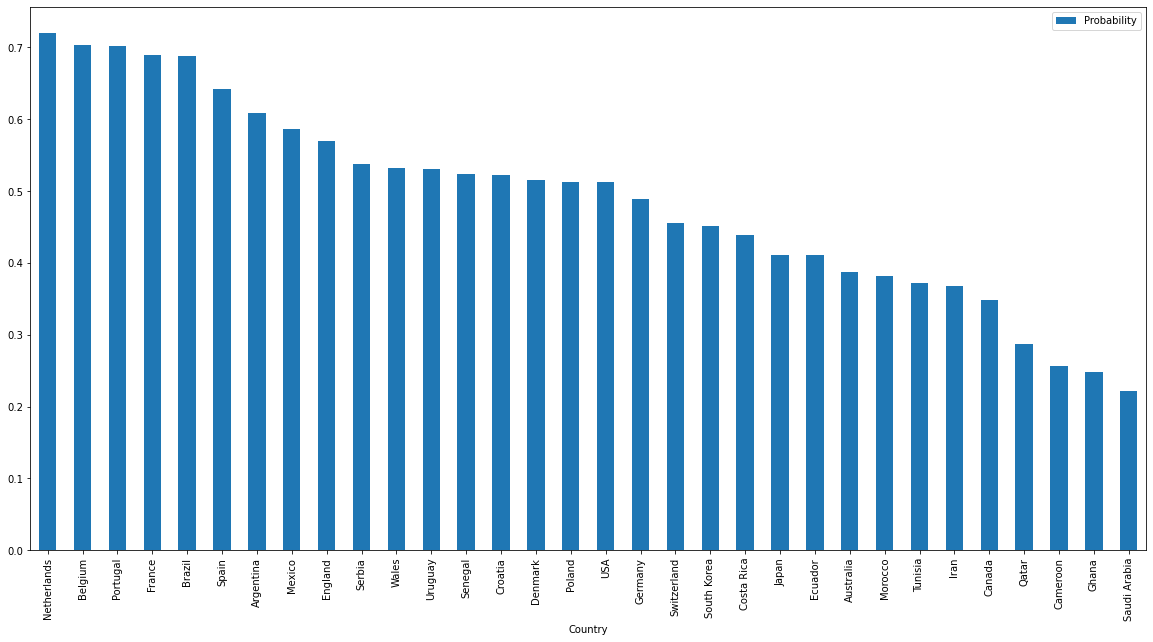

In [39]:
prob_df = pd.DataFrame(country_total_prob, columns =['Country', 'Probability']) 

prob_df.plot(x="Country", y="Probability", kind="bar", figsize=(20,10))


# End of the Notebook

Thanks for Reading!

If it was interesting to you, please give an upvote :D